# **Problem Statement 12**

Implementing Feedforward neural networks with Keras and TensorFlow



```
a.	Import the necessary packages
b.	Load the training and testing data (MNIST/CIFAR10)
c.	Define the network architecture using Keras
d.	Train the model using SGD
e.	Evaluate the network
f.	Plot the training loss and accuracy

```



## **Import Necessary Packages**

In [22]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Load Training and Testing Data**

In [23]:
train_data = pd.read_csv("/content/train_data.csv")
test_data = pd.read_csv("/content/test_data.csv")

In [24]:
train_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [18]:
# train_data.drop(0, inplace=True)

KeyError: '[0] not found in axis'

In [25]:
x_train = train_data.drop("label", axis=1)

In [26]:
x_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


In [27]:
y_train = train_data["label"]
y_train.head()

,label
0,6
1,9
2,9
3,4
4,1


In [28]:
test_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6


In [30]:
x_test = test_data.drop("label", axis=1)
x_test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,112,49,159,111,47,165,116,51,166,...,145,24,77,124,34,84,129,21,67,110
1,235,235,235,231,231,231,232,232,232,232,...,163,168,183,178,180,195,191,186,200,199
2,158,190,222,158,187,218,139,166,194,132,...,37,5,6,8,4,5,3,7,8,7
3,155,156,149,167,176,187,176,179,193,190,...,53,60,63,50,64,65,52,73,68,50
4,65,68,50,70,81,64,48,64,46,30,...,147,143,179,136,154,185,146,128,156,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,235,204,219,236,200,215,234,199,216,236
9996,81,57,43,91,69,53,98,75,63,106,...,173,155,139,129,171,167,147,167,164,160
9997,20,15,12,19,14,11,15,14,11,15,...,51,24,23,50,26,23,53,25,20,47
9998,25,40,12,15,36,3,23,41,18,17,...,78,93,124,80,95,123,81,92,120,80


In [33]:
y_test = test_data["label"]
y_test.head()

,label
0,3
1,8
2,8
3,0
4,6


In [34]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [35]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train.shape

(50000, 3072)

In [36]:
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train.astype("int32"))
y_test = lb.transform(y_test.astype("int32"))

## **Model Building**

In [38]:
model = Sequential()
model.add(Dense(64, input_shape=(3072, ), activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
from keras.optimizers import Adam
sgd = SGD()


model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

h = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1230 - loss: 2.3060 - val_accuracy: 0.1666 - val_loss: 2.2611
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1598 - loss: 2.2565 - val_accuracy: 0.1722 - val_loss: 2.2143
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1784 - loss: 2.2055 - val_accuracy: 0.1881 - val_loss: 2.1918
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1746 - loss: 2.1837 - val_accuracy: 0.1850 - val_loss: 2.1548
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1774 - loss: 2.1780 - val_accuracy: 0.1365 - val_loss: 2.2162
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1690 - loss: 2.1829 - val_accuracy: 0.1726 - val_loss: 2.1362
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1785 - loss: 2.1484 - val_accuracy: 0.1546 - val_loss: 2.1846
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1743 - loss: 2.1537

In [43]:
predictions = model.predict(x_test)

print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = [str(x) for x in lb.classes_]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.23      0.13      0.17      1000
           1       0.11      0.12      0.12      1000
           2       0.00      0.00      0.00      1000
           3       0.09      0.00      0.00      1000
           4       0.14      0.62      0.23      1000
           5       0.11      0.00      0.00      1000
           6       0.27      0.23      0.25      1000
           7       0.00      0.00      0.00      1000
           8       0.23      0.69      0.34      1000
           9       0.03      0.00      0.00      1000

    accuracy                           0.18     10000
   macro avg       0.12      0.18      0.11     10000
weighted avg       0.12      0.18      0.11     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[]

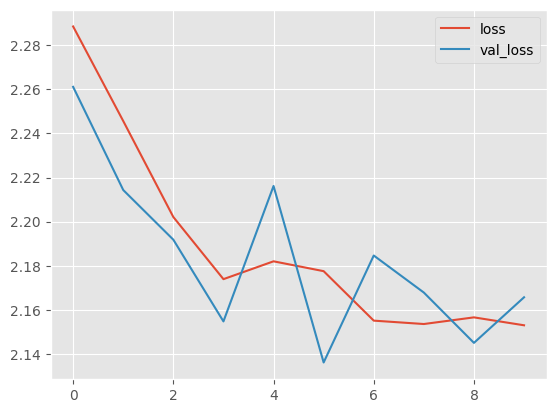

In [48]:
plt.style.use("ggplot")
plt.figure()

plt.plot(h.history["loss"], label="loss")
plt.plot(h.history["val_loss"], label="val_loss")

plt.legend()
plt.plot()